# Custom Zimbabwe Base Model - Calibrate to 2020

In this file the objectives are as follows: 

1. See what the default model produces under different conditions:  
  a) without any calibration, when the country location and population size is specified only  
  b) when I adapt the number of contacts to be manicaland numbers  
  c) when I adapt the beta value  


2. Establish which callibration is the most effective for Zimbabwe: 
This will only happen very roughly here to try to get the number of cases and deaths within the right orders of magnitude for the country. Following this, in a separate program I can run Optuna or EMA workbench to figure out the exact number of contacts/beta values required at each point


3. Output results: 
So I can compare back under each set of circumstances

All of these will be run against the calibration data in the calibration_data folder on cases and deaths between 20th March 2020 and 1st Sept 2020


## 0. Import required packages

In [56]:
import covasim as cv
import numpy as np

## Scenario A See what default model produces  - only country location and pop size specified

In [58]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population default is again 20k 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    verbose = 0 # means it won't print all the output 
)


### Take a look at population characteristics from input data (of country (location) as defined above)
Nb. These are the same for every scenario

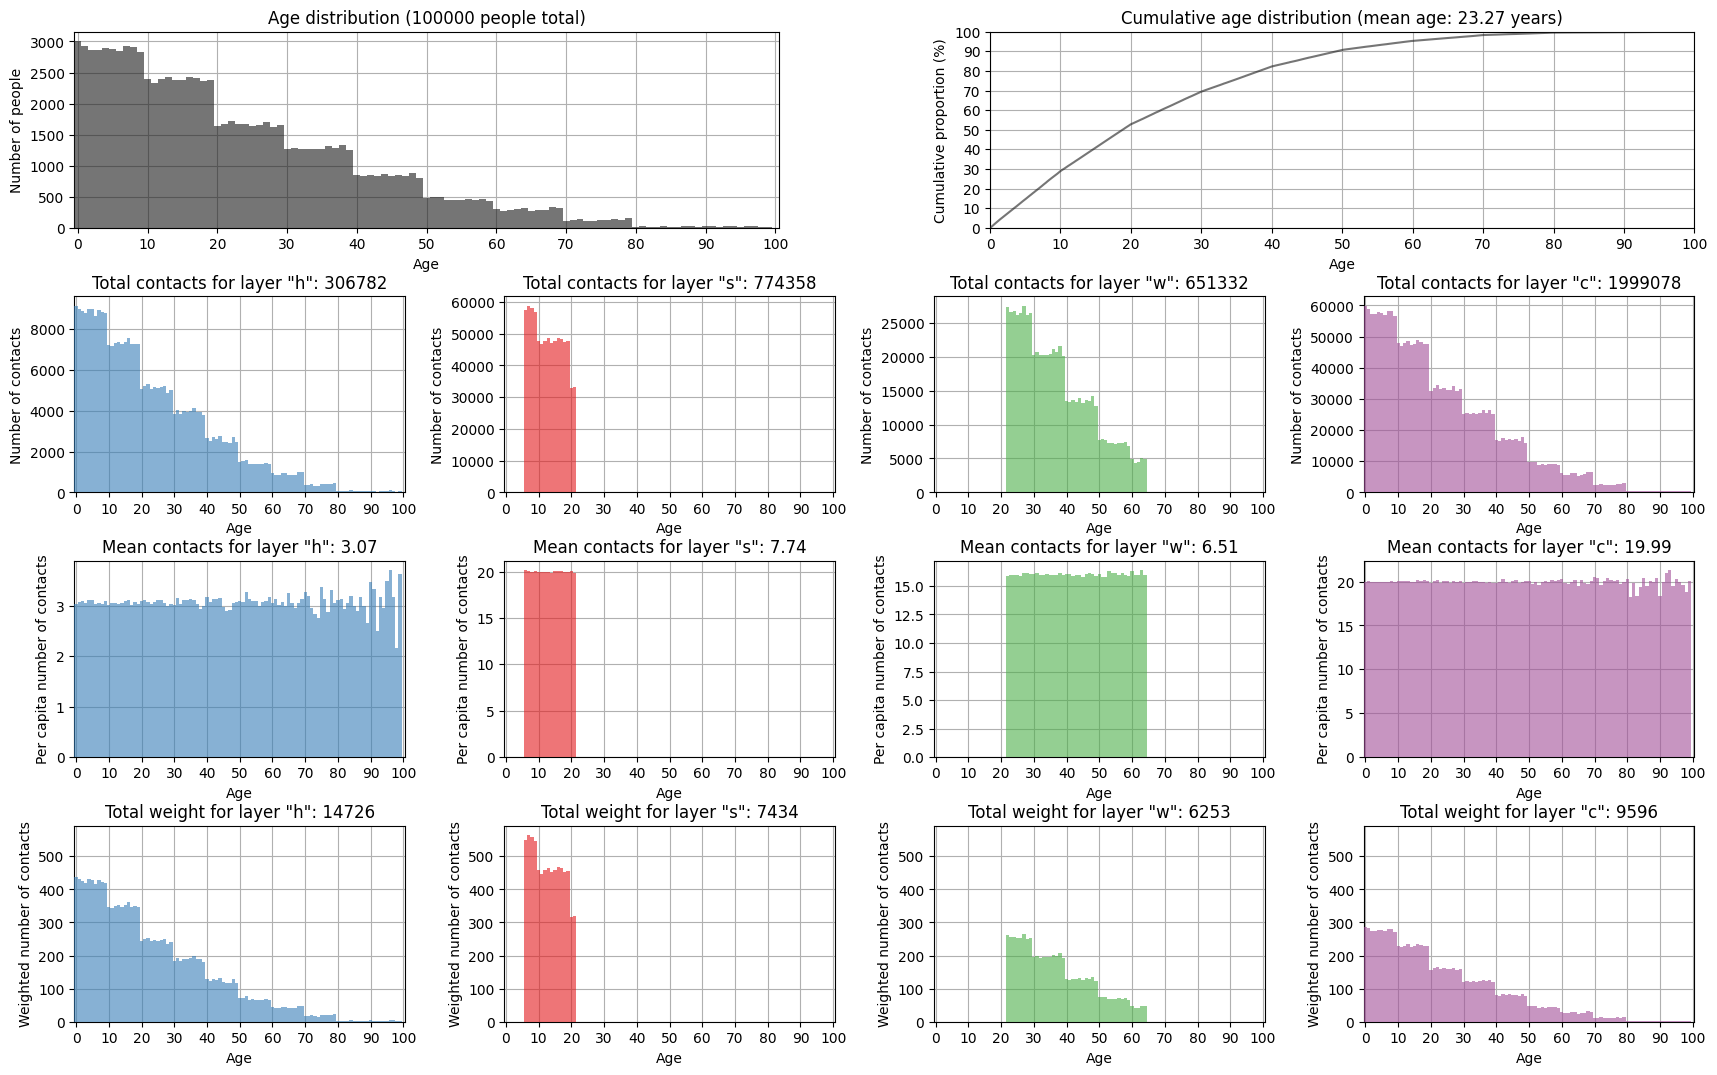

In [59]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

sim = cv.Sim(pars)
sim.initialize()
fig = sim.people.plot()

# average age is 23.27 years

### run simulation for this default scenario 

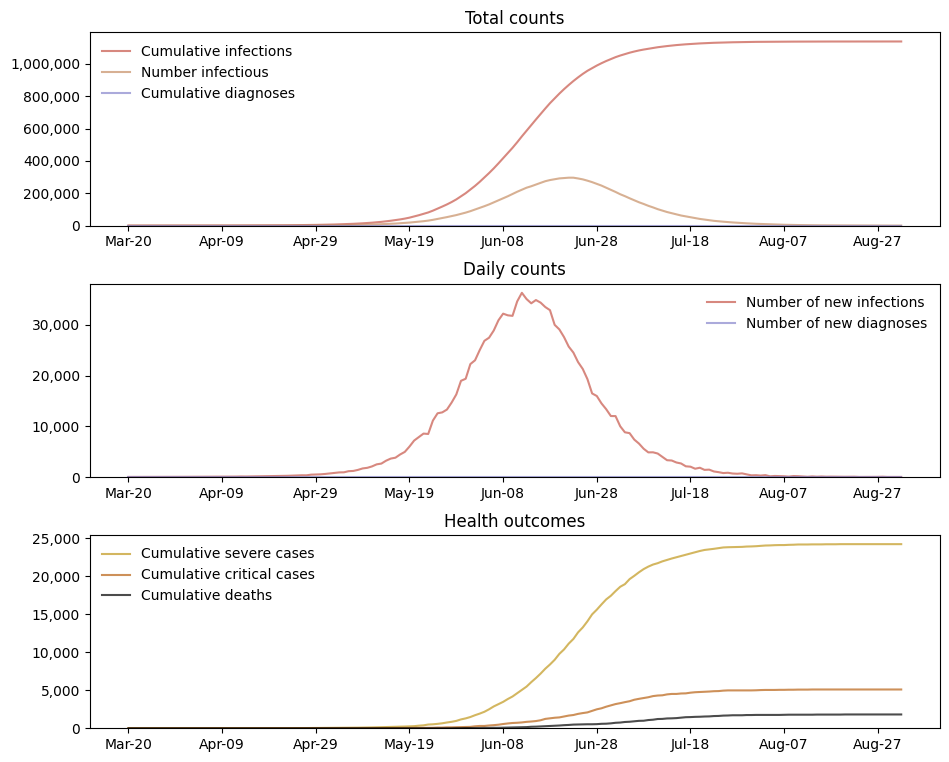

In [60]:
# just take a look at how changing beta changes the trajectory 
sim.run()
scenariofig = sim.plot()  
sim.plot()

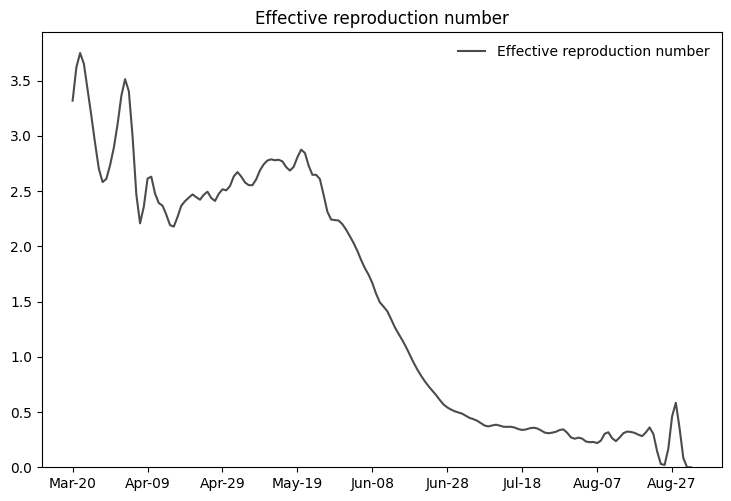

In [61]:
# take a look at the r value 
sim.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers in mid-June (full details see col Y of output n_infectious) 
- Case numbers peak at around 35000 
- Deaths are below 1000 (full details see col K of output)
- R eff starts around 3.5 and drops completely to 0 by September (full details see col AH)

### Save output

In [62]:
sim.save('../outputs/zim-sim_default_scenario_A.sim')
sim.to_excel('../outputs/zim-sim_default_scenario_A.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/outputs/zim-sim_default_scenario_A.xlsx.


## Scenario B. Country location, pop size and number of contacts (Maincaland) specified

In [63]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    contacts=dict(h=6, s=6, w=4, c=2),
    #school_ages = [5, 21], 
    #work_ages = [20, 61],
    verbose = 0 # means it won't print all the output 
)


# other things you can re-define in pars include n_days, beta  (As below)

# adapt one by one 

### run simulation for adapted contacts (Manicaland) scenario 

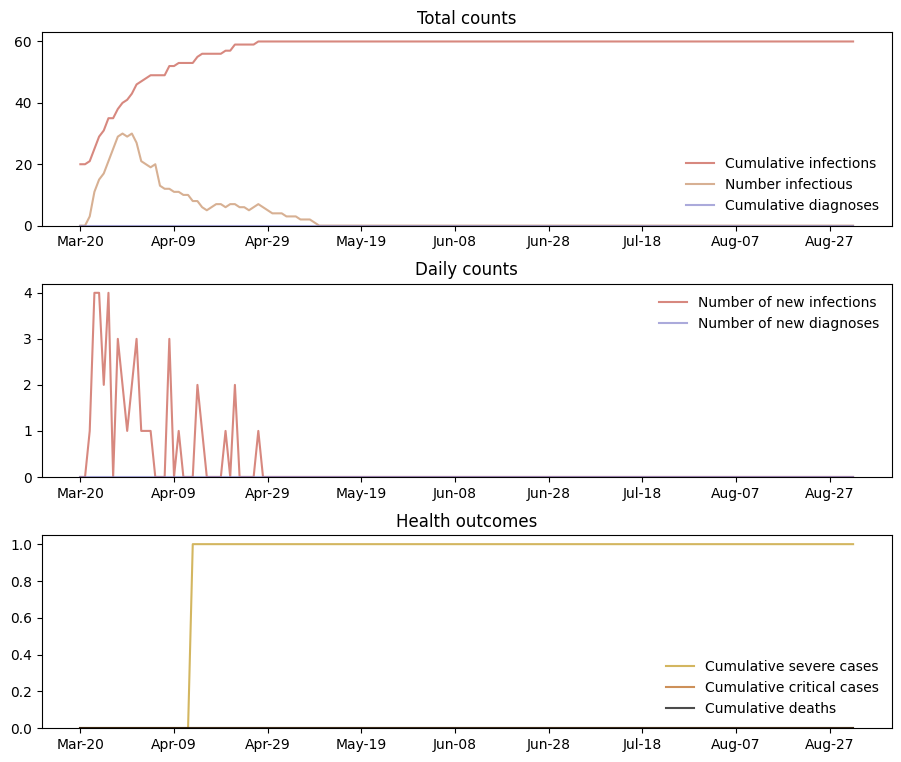

In [64]:
# just take a look at how changing beta changes the trajectory 
sim2 = cv.Sim(pars)
sim2.run()
scenariofig = sim2.plot()  #  this will only work if I run sim.run() not msim.run()
sim2.plot()

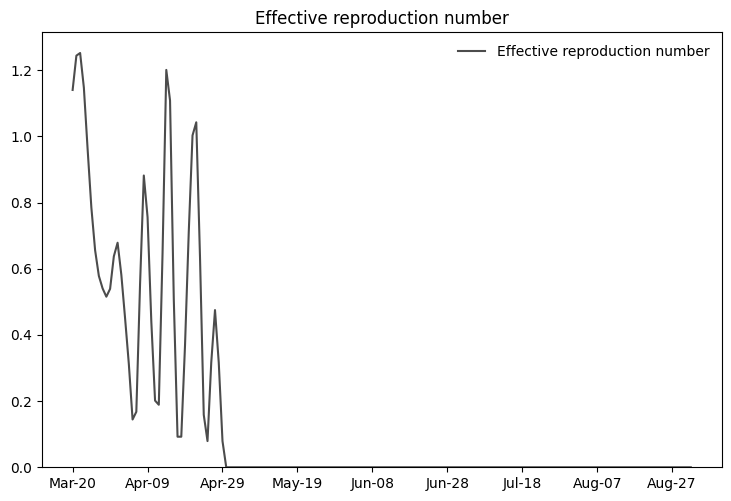

In [65]:
# take a look at the r value 
sim2.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers at the middle of March (full details see col Y of output n_infectious) 
- Case numbers peak at around 4 
- Deaths are below 1! (full details see col K of output)
- R eff starts around 1.2 and drops completely to 0 by May (full details see col AH)

### Save output

In [66]:
sim.save('../outputs/zim-sim_manicaland_scenario_B.sim')
sim.to_excel('../outputs/zim-sim_manicaland_scenario_B.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/outputs/zim-sim_manicaland_scenario_B.xlsx.


Before running Scenario C where I change default Beta values, I want to look at the validation data and see if I can infer an R value

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns


In [68]:
# import the data
df_cases = pd.read_stata('../calibration_data/national_cases_by_day.dta')
df_deaths = pd.read_stata('../calibration_data/national_deaths_by_day.dta')

In [69]:
df_cases.head()
# want to convert the values to integers will figure out later

,date,cases_by_day
0,2020-03-20,2.0
1,2020-03-24,1.0
2,2020-03-25,1.0
3,2020-03-27,3.0
4,2020-03-30,1.0


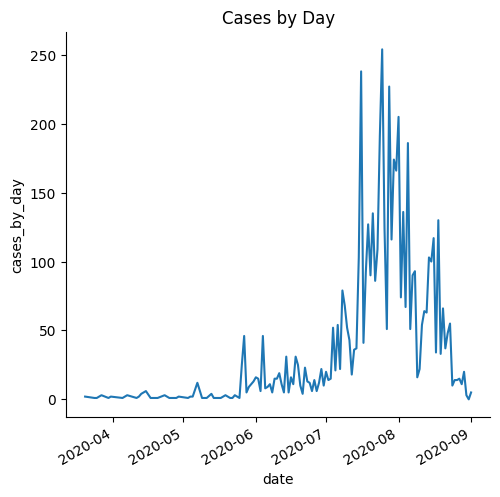

In [70]:
g = sns.relplot(x="date", y="cases_by_day", kind="line", data=df_cases).set(title="Cases by Day")
g.fig.autofmt_xdate()

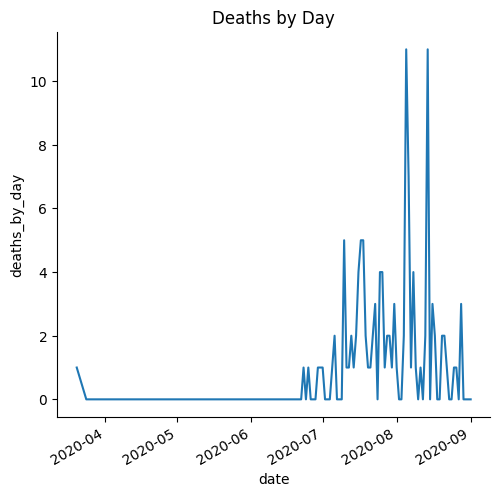

In [71]:
g = sns.relplot(x="date", y="deaths_by_day", kind="line", data=df_deaths).set(title="Deaths by Day")
g.fig.autofmt_xdate()

## 1c. Country location, pop size and number of contacts (Maincaland) specified & Beta value adapted

In [72]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    contacts=dict(h=6, s=6, w=4, c=2),
    #beta_layer  = dict(h=3.0, s=0.6, w=0.6, c=0.3),  # Per-population beta weights; 
    verbose = 0 # means it won't print all the output 
)



In [73]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

#change the transmission rate (default beta value is 0.016?) -- you can also change the relative weighting of beta in h,s,w,c in Line 145
cb = cv.change_beta(days=['2020-03-20'], changes=[2.0])  # want to understand better what this is really doing 
# increasing the beta on around 1st August 

sim3 = cv.Sim(pars, interventions=cb, label='With changes in RO from 1st March')

## 4. Run base simulation

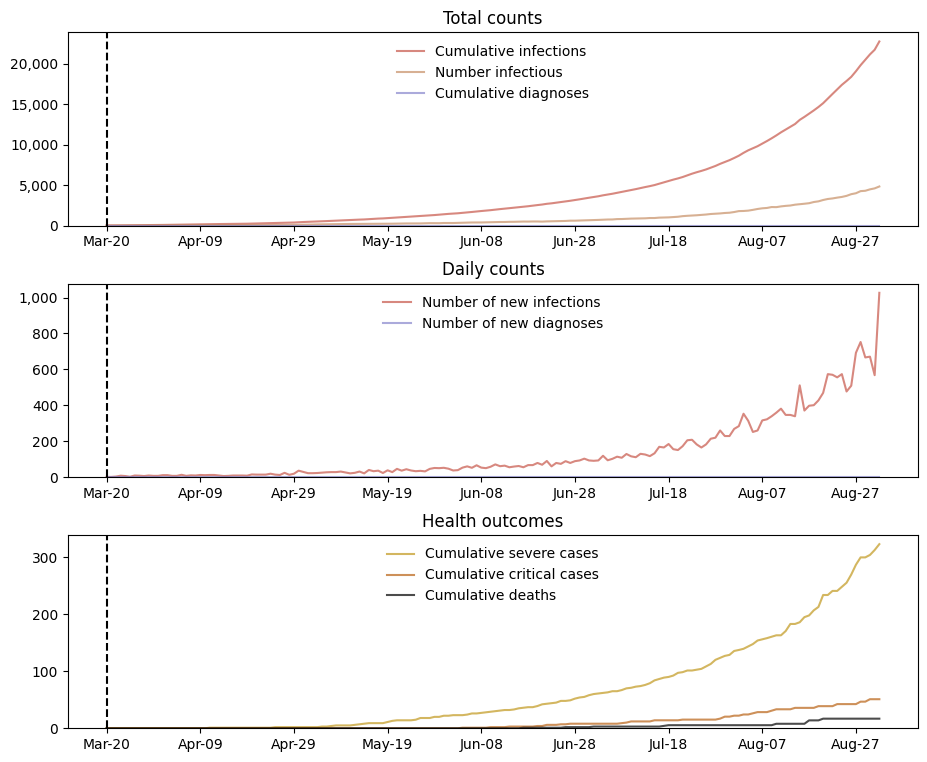

In [74]:
# just take a look at how changing beta changes the trajectory 
sim3.run()
scenariofig = sim3.plot()  #  this will only work if I run sim.run() not msim.run()
sim3.plot()

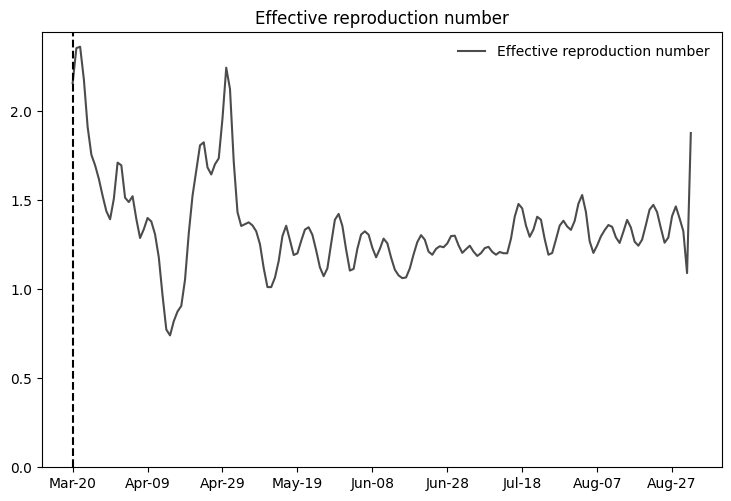

In [75]:
# take a look at the r value 
sim3.plot_result('r_eff')

## 7. Save output

In [76]:
sim3.save('../outputs/zim-sim_change_beta_scenario_C.sim')
sim3.to_excel('../outputs/zim-sim_change_beta_scenario_C.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/outputs/zim-sim_change_beta_scenario_C.xlsx.


## 8. Save notebook to .html

In [77]:
!jupyter nbconvert ZIM_retro_calibration.ipynb --to html --output ../html_notebooks/ZIM_retro_calibration_140521.html

[NbConvertApp] Converting notebook ZIM_retro_calibration.ipynb to html
[NbConvertApp] Writing 1080828 bytes to ../html_notebooks/ZIM_retro_calibration_140521.html
